Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [175]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [176]:
#### load the movie dataset and create their dataframes

movies_df = df = pd.read_csv("movies.csv")
movies_df.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [177]:
# code here
movies_df.drop(['homepage','keywords', 'id', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis=1, inplace=True)
movies_df.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


#### Remove any duplicate rows

In [178]:
# code here
movies_df.sort_values("title", inplace=True)
movies_df.drop_duplicates(subset='title', keep='first', inplace=False)
movies_df

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
4257,1500000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 9648, ""na...",2.815228,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",#Horror,3.3,52
3339,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",45.610993,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",(500) Days of Summer,7.2,2904
3556,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",53.698683,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Cloverfield Lane,6.8,2468
2903,1200000,"[{""id"": 18, ""name"": ""Drama""}]",0.489271,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-11-20,0,111.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Days in a Madhouse,4.3,5
2739,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",54.550275,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-03-30,53478166,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",10 Things I Hate About You,7.3,1701
...,...,...,...,...,...,...,...,...,...,...,...
3524,5600000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",22.341462,"[{""iso_3166_1"": ""ES"", ""name"": ""Spain""}]",2009-09-15,18469680,85.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",[REC]²,6.4,489
2084,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",21.928025,"[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}, {""iso...",1999-04-14,2856712,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",eXistenZ,6.7,475
568,70000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",46.217769,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-08-09,277448382,124.0,"[{""iso_639_1"": ""cs"", ""name"": ""\u010cesk\u00fd""...",xXx,5.8,1424
767,60000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",36.689223,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-04-27,71073932,101.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",xXx: State of the Union,4.7,549


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [179]:
# Code here
movies_df.drop(movies_df[movies_df['revenue'] == 0].index, inplace = True)
movies_df.drop(movies_df[movies_df['budget'] == 0].index, inplace = True)
movies_df.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
3339,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",45.610993,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",(500) Days of Summer,7.2,2904
3556,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",53.698683,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Cloverfield Lane,6.8,2468
2739,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",54.550275,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-03-30,53478166,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",10 Things I Hate About You,7.3,1701
393,85000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",9.895061,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2000-10-07,183611771,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",102 Dalmatians,5.1,313
3293,8000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",3.942464,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-02-19,143451,107.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10th & Wolf,6.3,24


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [180]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'], format= '%Y-%m-%d')
#movies_df.head()

# Extract the release year from every release date
movies_df['release_year'] = pd.DatetimeIndex(movies_df['release_date']).year
movies_df.release_year

3339    2009
3556    2016
2739    1999
393     2000
3293    2006
        ... 
3524    2009
2084    1999
568     2002
767     2005
854     2005
Name: release_year, Length: 3229, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [181]:
# code here
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)
movies_df.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
3339,7500000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",45.610993,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-07-17,60722734,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",(500) Days of Summer,7.2,2904,2009
3556,15000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",53.698683,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-10,108286421,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10 Cloverfield Lane,6.8,2468,2016
2739,16000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",54.550275,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-03-30,53478166,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",10 Things I Hate About You,7.3,1701,1999
393,85000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",9.895061,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2000-10-07,183611771,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",102 Dalmatians,5.1,313,2000
3293,8000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",3.942464,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-02-19,143451,107.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",10th & Wolf,6.3,24,2006


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [182]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
3339,7500000,"['Comedy', 'Drama', 'Romance']",45.610993,['United States of America'],2009-07-17,60722734,95.0,"['English', 'Français', 'svenska']",(500) Days of Summer,7.2,2904,2009
3556,15000000,"['Thriller', 'Science Fiction', 'Drama']",53.698683,['United States of America'],2016-03-10,108286421,103.0,['English'],10 Cloverfield Lane,6.8,2468,2016
2739,16000000,"['Comedy', 'Romance', 'Drama']",54.550275,['United States of America'],1999-03-30,53478166,97.0,"['English', 'Français']",10 Things I Hate About You,7.3,1701,1999
393,85000000,"['Comedy', 'Family']",9.895061,['United States of America'],2000-10-07,183611771,100.0,['English'],102 Dalmatians,5.1,313,2000
3293,8000000,"['Action', 'Crime', 'Drama', 'Mystery', 'Thril...",3.942464,['United States of America'],2006-02-19,143451,107.0,['English'],10th & Wolf,6.3,24,2006


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [228]:
# Code here

movies_df.sort_values('budget', ascending=False).head()
#movies_df.sort_values('budget', ascending=True).head()


,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
17,380000000,"['Adventure', 'Action', 'Fantasy']",135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,665713802
1,300000000,"['Adventure', 'Fantasy', 'Action']",139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000
7,280000000,"['Action', 'Adventure', 'Science Fiction']",134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006,121081192
6,260000000,"['Animation', 'Family']",48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936


The top 5 most expensive movies are: 
Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: As World's End, Avengers: Age of Ultron, Superman Returns, and Tangled
All of the top 5 most expensive movies made a significant profit.

The data for lowest budget movies is incomplete/inaccurate and cannot be effectively analysed, possibly owing to
their age/historical data loss.

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [184]:
# code here

movies_df['profit'] = movies_df.revenue - movies_df.budget
movies_df.sort_values('profit', ascending=False).head()


,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910


The top 5 most profitable movies are:
Avatar, Titanic, Jurassic World, Furious 7, and The Avengers
None of the top 5 most profitable movies are included on the top 5 most expensive movies, suggesting bigger spending 
does not always equate to a larger profit.
The vote_average and vote_count for the top 5 most profitable movies are also all higher than the top 5 most expensive.

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [185]:
movies_df.sort_values('popularity', ascending=False).head()

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


#### Find Movies which are rated above 7



In [226]:
# Code here
rated_seven = movies_df[(movies_df.vote_average > 7)]
rated_seven.sort_values('vote_average', ascending=False)


,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
2970,10500000,"['Drama', 'Comedy']",0.037073,['United States of America'],1994-09-02,123509,99.0,['English'],There Goes My Baby,8.5,2,1994,-10376491
1881,25000000,"['Drama', 'Crime']",136.747729,['United States of America'],1994-09-23,28341469,142.0,['English'],The Shawshank Redemption,8.5,8205,1994,3341469
3337,6000000,"['Drama', 'Crime']",143.659698,['United States of America'],1972-03-14,245066411,175.0,"['English', 'Italiano', 'Latin']",The Godfather,8.4,5893,1972,239066411
1818,22000000,"['Drama', 'History', 'War']",104.469351,['United States of America'],1993-11-29,321365567,195.0,"['Deutsch', 'Polski', 'עִבְרִית', 'English']",Schindler's List,8.3,4329,1993,299365567
662,63000000,['Drama'],146.757391,"['Germany', 'United States of America']",1999-10-15,100853753,139.0,['English'],Fight Club,8.3,9413,1999,37853753
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,6500000,"['Drama', 'History']",8.432401,['United States of America'],2009-11-13,1521261,113.0,"['English', 'Español']",The Messenger,7.1,119,2009,-4978739
134,150000000,"['Action', 'Adventure', 'Thriller']",114.522237,"['China', 'United States of America']",2015-07-23,682330139,131.0,"['Deutsch', 'English', 'svenska']",Mission: Impossible - Rogue Nation,7.1,3224,2015,532330139
3794,4000000,['Drama'],3.663108,"['Spain', 'France', 'Italy']",2002-09-27,146402,113.0,"['Español', 'Deutsch']",Mondays in the Sun,7.1,36,2002,-3853598
531,75000000,"['Comedy', 'Action', 'Adventure']",48.744209,['United States of America'],2015-08-13,108145109,116.0,"['Italiano', 'English', 'Pусский', 'Deutsch']",The Man from U.N.C.L.E.,7.1,2265,2015,33145109


637 movies are rated 7+

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [187]:
# Code here
movies_df.sort_values('profit', ascending=False).head(10)

,budget,genres,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910
7,280000000,"['Action', 'Adventure', 'Science Fiction']",134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694
124,150000000,"['Animation', 'Adventure', 'Family']",165.125366,['United States of America'],2013-11-27,1274219009,102.0,['English'],Frozen,7.3,5295,2013,1124219009
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
329,94000000,"['Adventure', 'Fantasy', 'Action']",123.630332,"['New Zealand', 'United States of America']",2003-12-01,1118888979,201.0,['English'],The Lord of the Rings: The Return of the King,8.1,8064,2003,1024888979
31,200000000,"['Action', 'Adventure', 'Science Fiction']",77.682080,"['China', 'United States of America']",2013-04-18,1215439994,130.0,['English'],Iron Man 3,6.8,8806,2013,1015439994


The most profitable movie was released in 2009.
3 out of the top 5 most profitable movies were released after 2010.
The remaining top 5 most profitable movie was released before 2000.
Therefore there is a gap from 1998 - 2008 where movies were not as profitable as these movies. 

By expanding the data to top 10 movies, it's clear that Avatar is an outlier as all other top 10 profitable movies 
were released from 2012 onwards. It is unsurprising that there is otherwise a gap until 2012 considering the global 
financial crisis in 2008, which will have both impacted studios' budgets and customers' spending power.

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

<AxesSubplot: ylabel='0'>

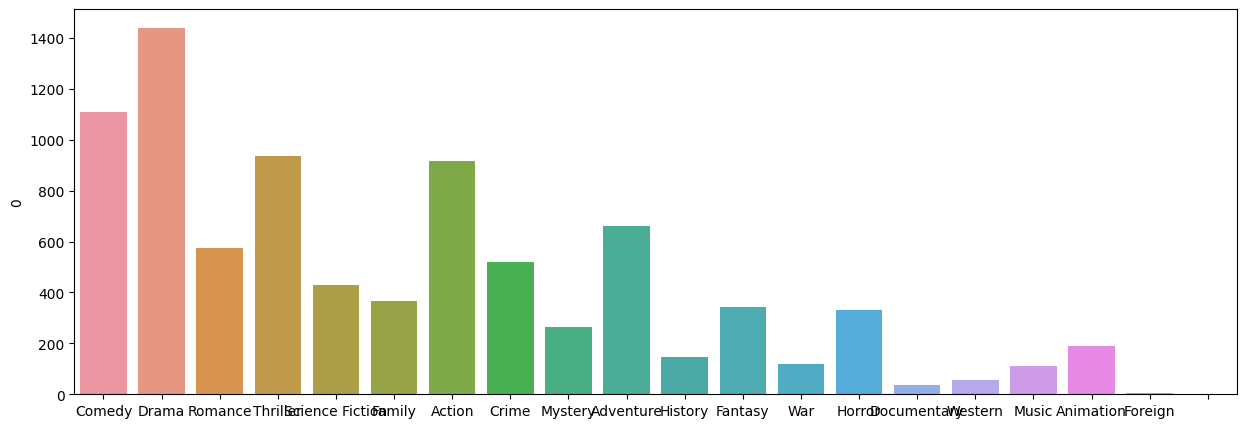

In [188]:
#Code here
freq = {}

def genre_count(row):
    temp = row.genres[1:-1]
    temp = temp.split(", ")
    for genre in temp:
        if genre[1:-1] not in freq:
            freq[genre[1:-1]] = 1
        else:
            freq[genre[1:-1]] += 1
            
movies_df.apply(genre_count, axis=1)
#print(freq)

for key in freq:
    freq[key] = [freq[key]]
    
freq_df = pd.DataFrame(freq)
freq_df = freq_df.iloc[:,:]

freq_df = freq_df.transpose()
#freq_df

plt.figure(figsize=(15,5))
sns.barplot(freq_df, x=freq_df.index, y=0)

<AxesSubplot: xlabel='0'>

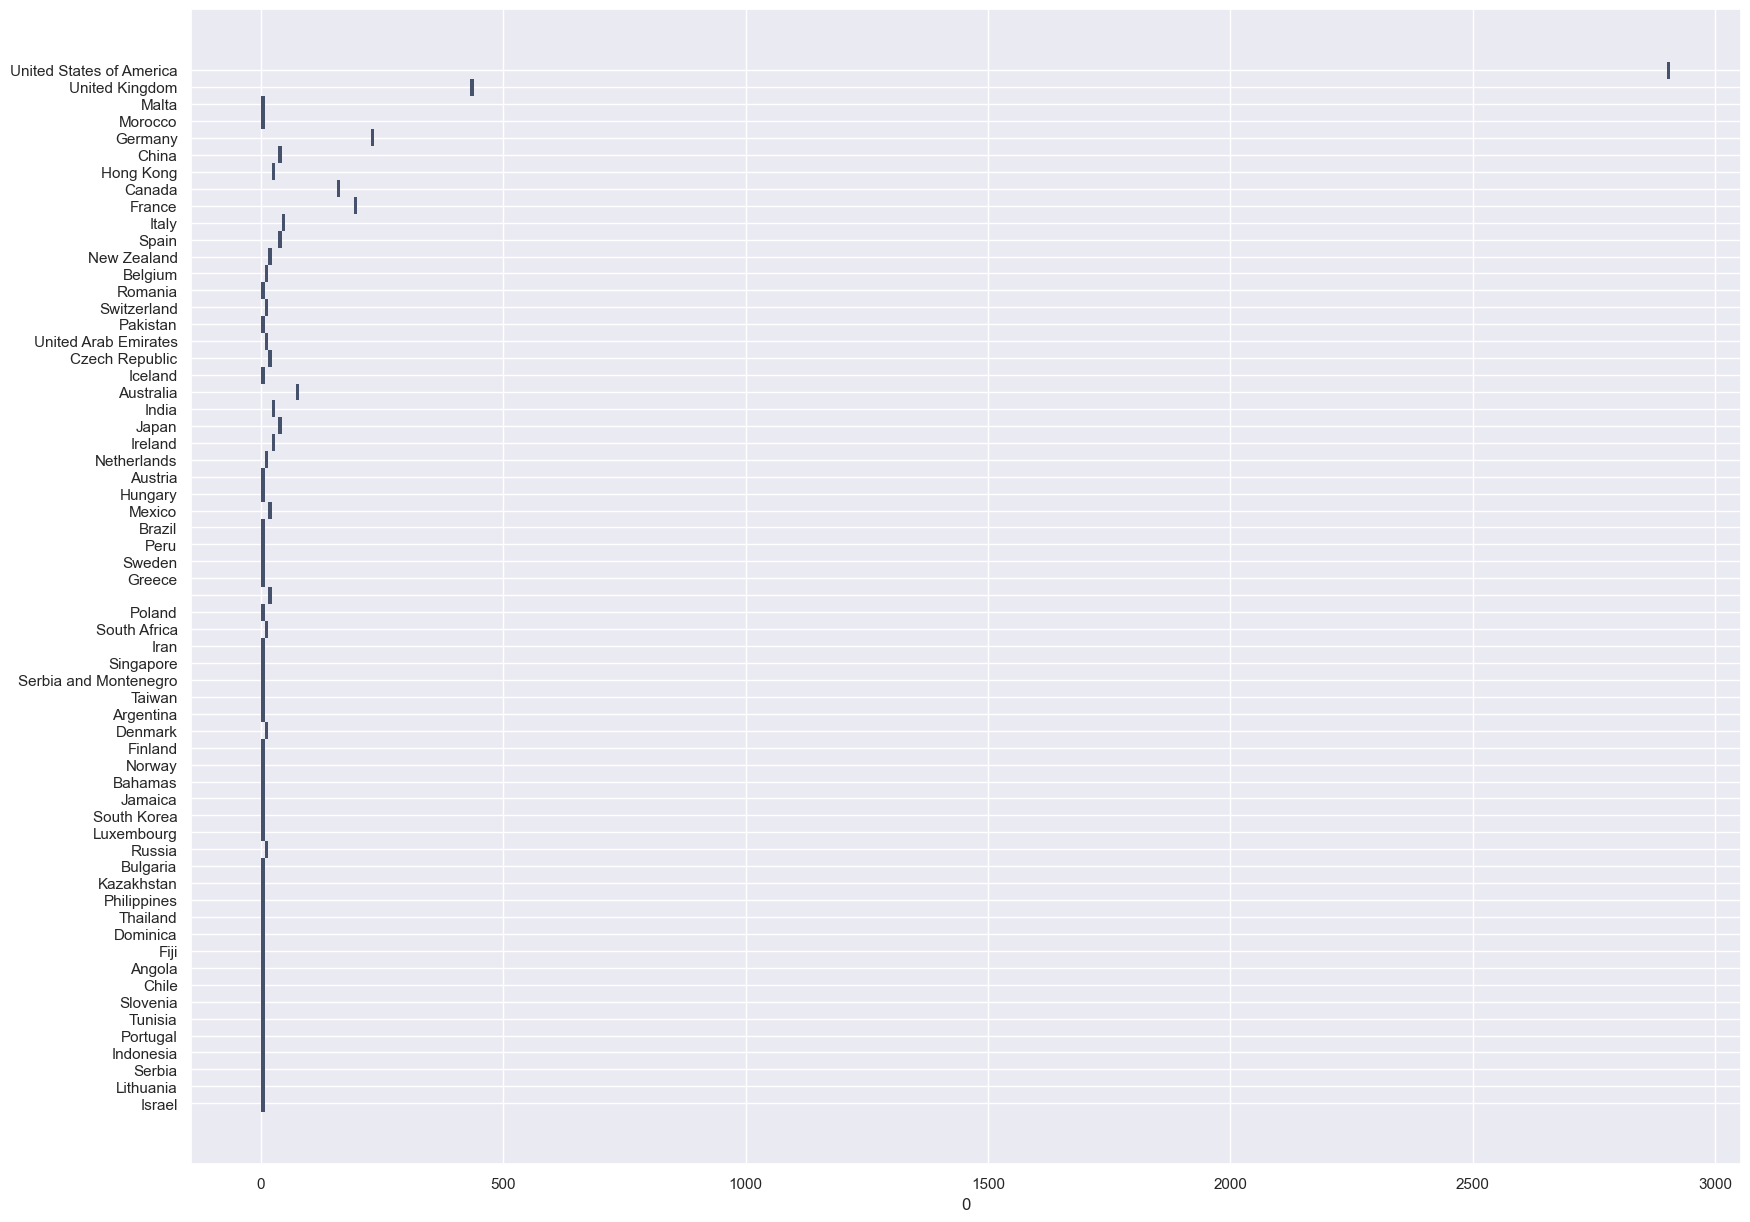

In [212]:
#### Generate three different interesting visualisations with a data story.
pcfreq = {}

def pc_count(row):
    temp = row.production_countries[1:-1]
    temp = temp.split(", ")
    for country in temp:
        if country[1:-1] not in pcfreq:
            pcfreq[country[1:-1]] = 1
        else:
            pcfreq[country[1:-1]] += 1
            
movies_df.apply(pc_count, axis=1)
#print(freq)

for key in pcfreq:
    pcfreq[key] = [pcfreq[key]]
    
pcfreq_df = pd.DataFrame(pcfreq)
pcfreq_df = pcfreq_df.iloc[:,:]

pcfreq_df = pcfreq_df.transpose()
pcfreq_df

sns.set(style="darkgrid")
plt.figure(figsize=(20,15))
sns.histplot(pcfreq_df, x=0, y=pcfreq_df.index)



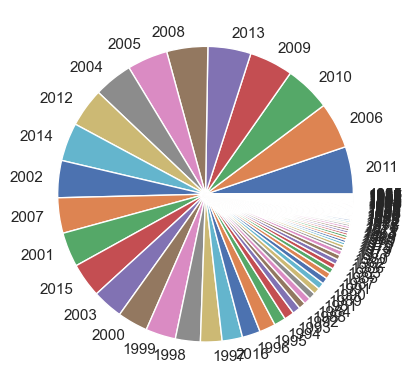

In [227]:
data = movies_df['release_year'].value_counts()
plt.pie(data, labels=data.index)
plt.show()

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)

<AxesSubplot: xlabel='0'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26222 (\N{CJK UNIFIED IDEOGRAPH-666E}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 35805 (\N{CJK UNIFIED IDEOGRAPH-8BDD}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26412 (\N{

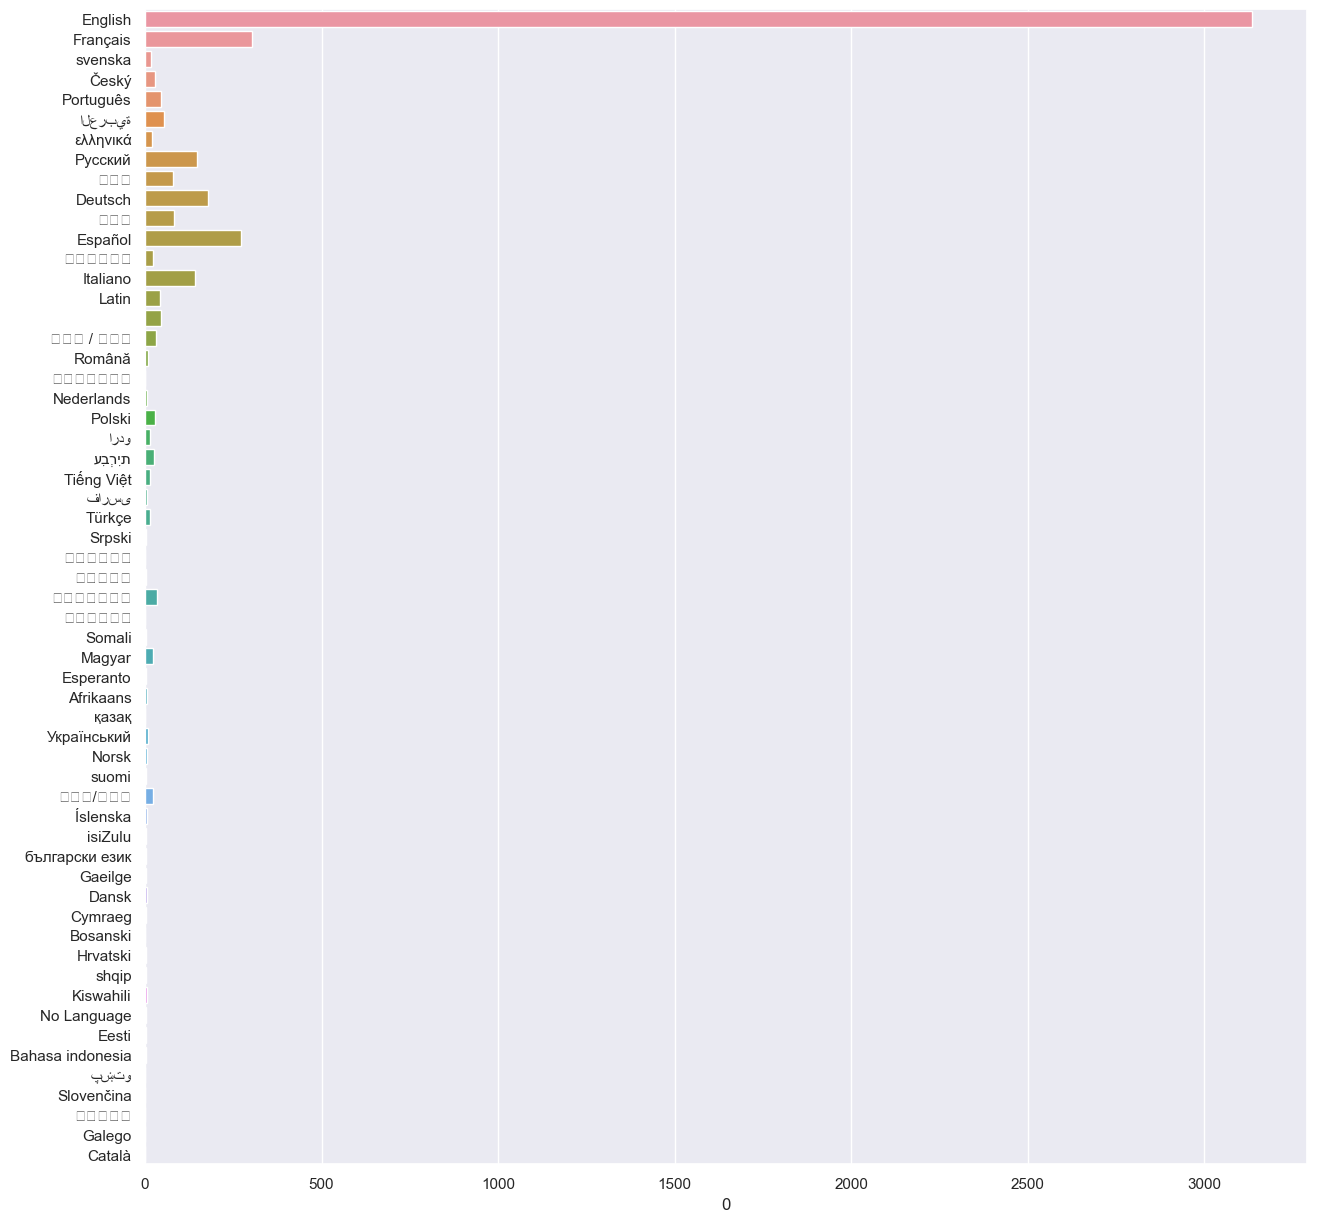

In [223]:
langfreq = {}

def lang_count(row):
    temp = row.spoken_languages[1:-1]
    temp = temp.split(", ")
    for lang in temp:
        if lang[1:-1] not in langfreq:
            langfreq[lang[1:-1]] = 1
        else:
            langfreq[lang[1:-1]] += 1
            
movies_df.apply(lang_count, axis=1)
#print(langfreq)

for key in langfreq:
    langfreq[key] = [langfreq[key]]
    key.encode('ascii', 'ignore').decode('ascii')
    
langfreq_df = pd.DataFrame(langfreq)
langfreq_df = langfreq_df.iloc[:,:]

langfreq_df = langfreq_df.transpose()
langfreq_df

plt.figure(figsize=(15,15))
sns.barplot(langfreq_df, x=0, y=langfreq_df.index)